In [1]:
#Import libraries
import pandas as pd
pd.set_option('display.max_columns', None)

#For visualization
import plotly.express as px

In [2]:
#Read the dataset
data_df = pd.read_csv("../data/churn.csv")

In [3]:
#Get overview of data
data_df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [4]:
print(f'The dataset consists of {data_df.shape[0]} rows and {data_df.shape[1]} columns')

The dataset consists of 7043 rows and 21 columns


The data fall under two categories:
- 17 Categorical features:
    - CustomerID: Customer ID unique for each customer
    - gender: Whether the customer is a male or a female
    - SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
    - Partner: Whether the customer has a partner or not (Yes, No)
    - Dependent: Whether the customer has dependents or not (Yes, No)
    - PhoneService: Whether the customer has a phone service or not (Yes, No)
    - MultipeLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
    - InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
    - OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
    - OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
    - DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
    - TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
    - StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
    - StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
    - Contract: The contract term of the customer (Month-to-month, One year, Two years)
    - PaperlessBilling: The contract term of the customer (Month-to-month, One year, Two years)
    - PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
    
***
    
- 3 Numerical features:

    - Tenure: Number of months the customer has stayed with the company 
    - MonthlyCharges: The amount charged to the customer monthly
    - TotalCharges: The total amount charged to the customer
      
***

- Prediction feature:
    - Churn: Whether the customer churned or not (Yes or No)
    
    
These features can also be sub-divided into:

- Demographic customer information

    - gender , SeniorCitizen , Partner , Dependents

- Services that each customer has signed up for

    - PhoneService , MultipleLines , InternetService , OnlineSecurity , OnlineBackup , DeviceProtection , TechSupport , StreamingTV , StreamingMovies, 
    
- Customer account information

    - tenure , Contract , PaperlessBilling , PaymentMethod , MonthlyCharges , TotalCharges

### Explore Target variable

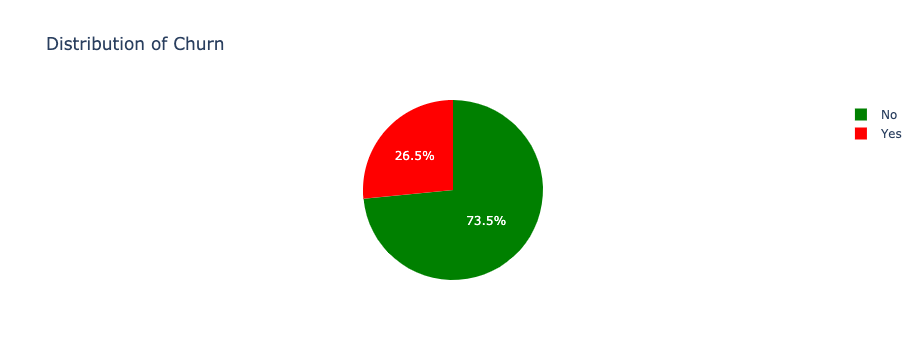

In [5]:
target_instance = data_df["Churn"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='Churn', names='Category', color_discrete_sequence=["green", "red"],
             title='Distribution of Churn')
fig.show()

We are trying to predict users that left the company in the previous month. It is a binary classification problem with an unbalance target.
- Churn: No - 73.5%
- Churn: Yes - 26.5%

### Explore Categorical features

In [6]:
#Defining bar chart function
def bar(feature):
    #Groupby the categorical feature
    temp_df = data_df.groupby([feature, 'Churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    #Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_df = data_df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    #Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    #Defining string formatting for graph annotation
    #Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, ' #append to empty string(formatted_str)
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str


    #Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)
    
    #Setting graph framework
    fig = px.bar(temp_df, x=feature, y='Count', color='Churn', title=f'Churn rate by {feature}', barmode="group", color_discrete_sequence=["green", "red"])
    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.4,
                y=1.3,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=400),
    )
    
    
    return fig.show()
    

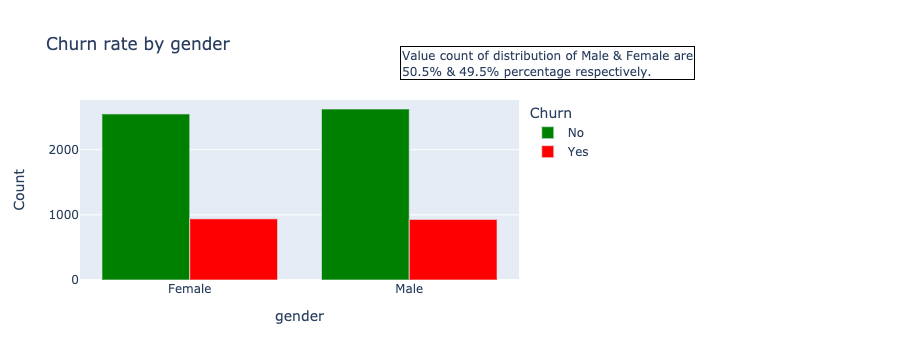

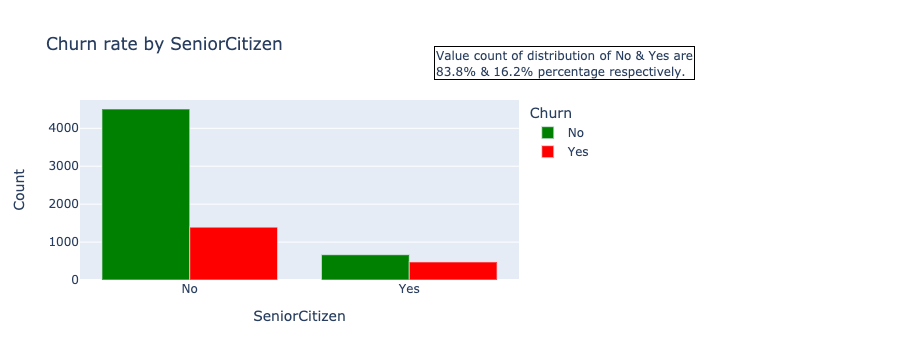

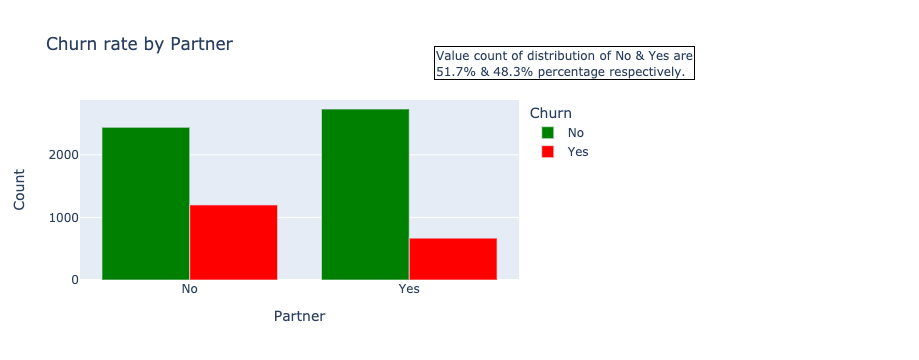

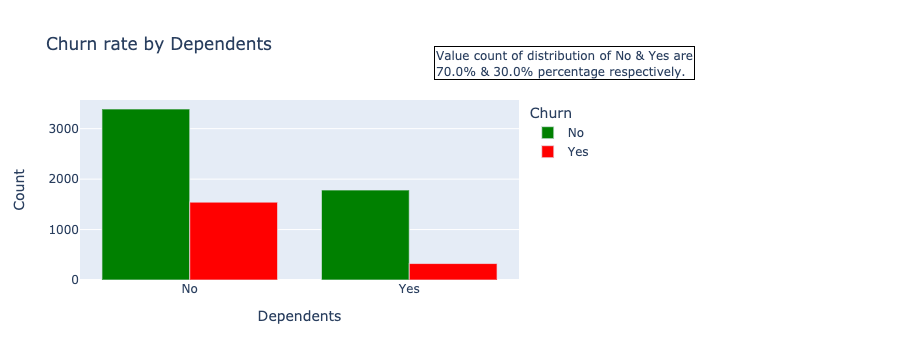

In [7]:
#Gender feature plot
bar('gender')
#SeniorCitizen feature plot 
data_df.loc[data_df.SeniorCitizen==0,'SeniorCitizen'] = "No"   #convert 0 to No in all data instances
data_df.loc[data_df.SeniorCitizen==1,'SeniorCitizen'] = "Yes"  #conver 1 to Yes in all data instaces
bar('SeniorCitizen')
#Partner feature plot
bar('Partner')
#Dependents feature plot
bar('Dependents')

***
**Demographic analysis Insight**: 
Gender and partner are even distributed with approximate percentage values. The difference in churn is slightly higher in females but the diffreence is negligible. There is a higher proportion of churn amongst younger customers (where SeniorCitizen is No), customers with no partners and customers with no dependents. These analysis on demographic section of data highlights on-senior citizens with no partners and dependents describe a particular segment of customers that are likely to churn.
***

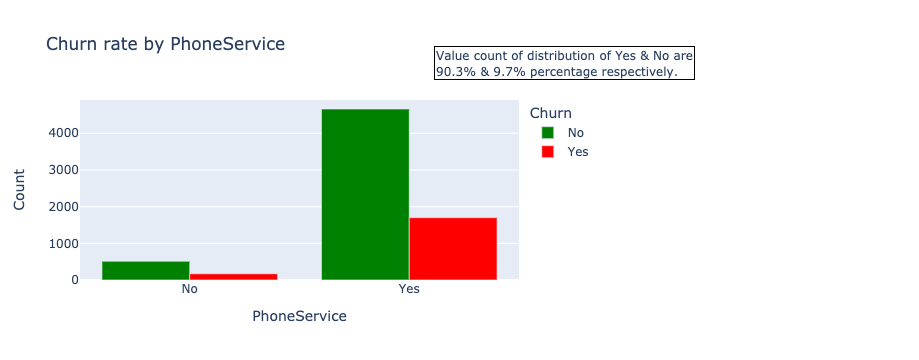

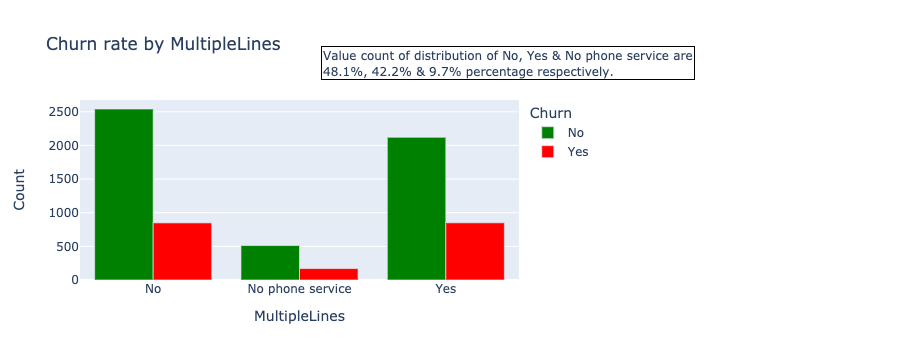

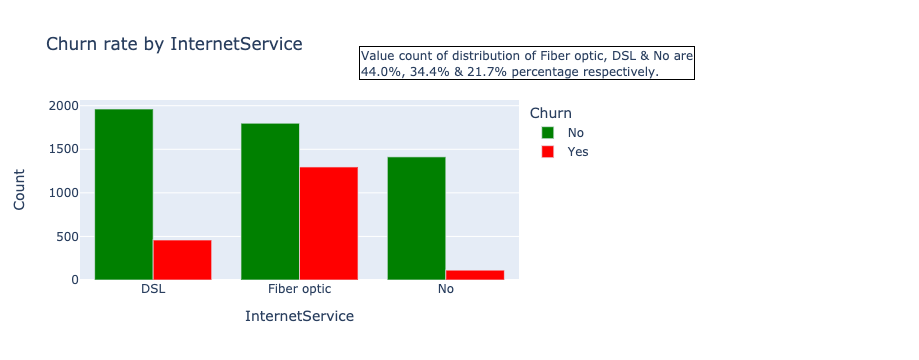

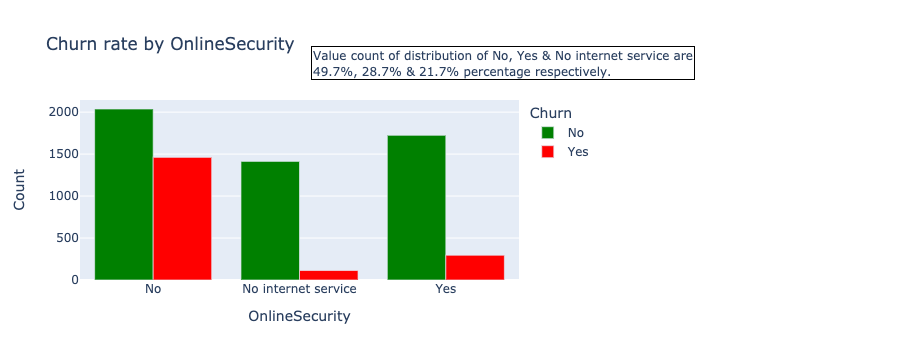

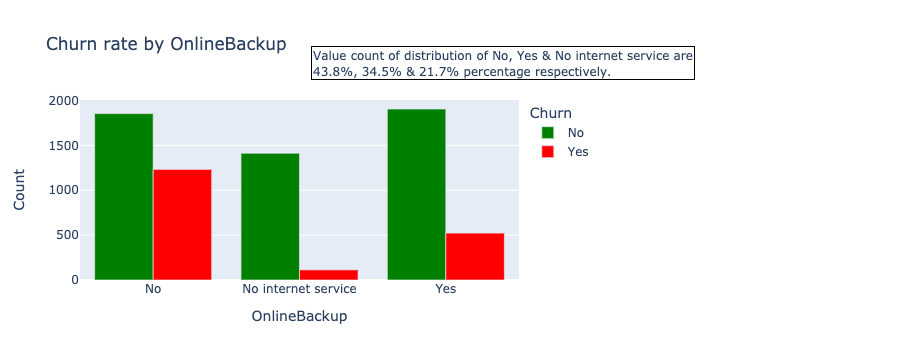

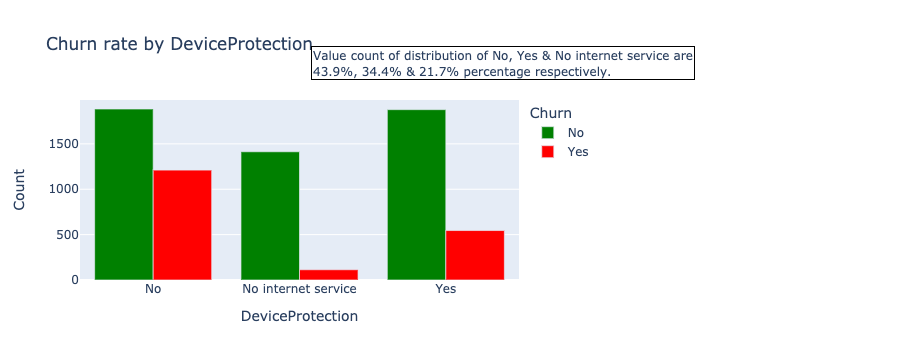

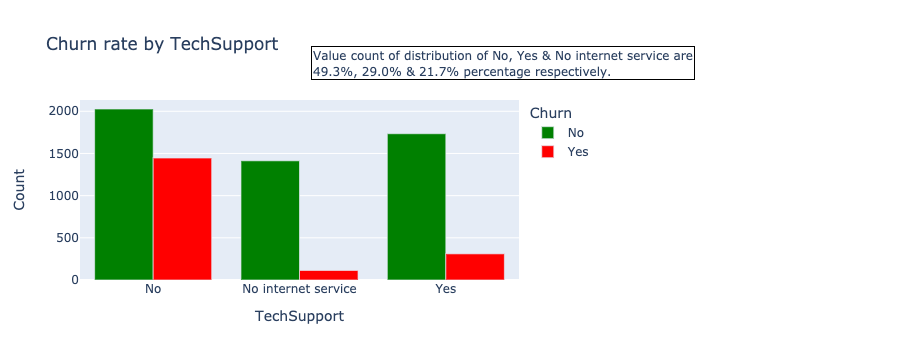

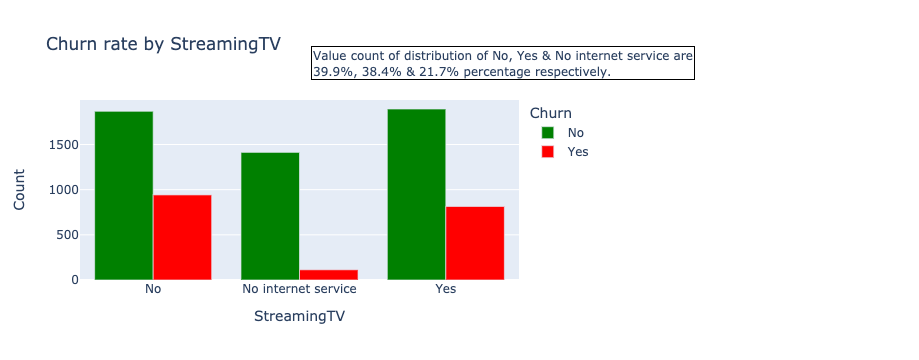

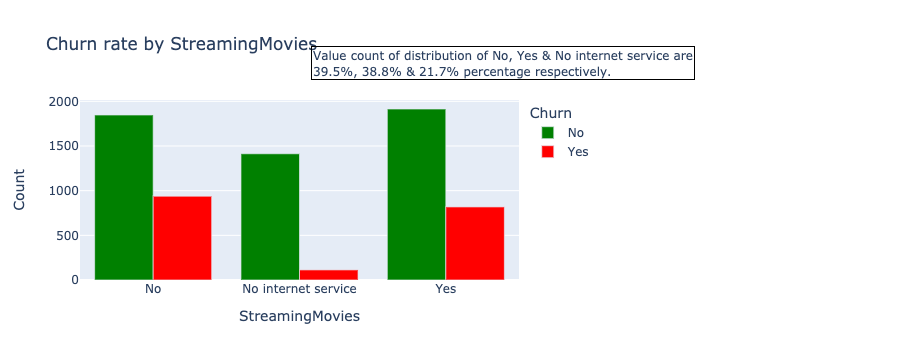

In [8]:
bar('PhoneService')
bar('MultipleLines')
bar('InternetService')
bar('OnlineSecurity')
bar('OnlineBackup')
bar('DeviceProtection')
bar('TechSupport')
bar('StreamingTV')
bar('StreamingMovies')

***
**Services that each customer has signed up for Insight**:
These category of features shows significant variations across their values. If a customer does not have a phone service, he/she cannot have multiple lines. About 90.3% of the customers have phone services and have the higher rate to churn. Customers who have Fibre optic as internet service are more likely to churn, this can happen due to high prices, competition, customer service, and many other reasons. Fiber optic service is much more expensive than DSL which may be one of the reasons why customers churn. Customers with  OnlineSecurity ,OnlineBackup ,DeviceProtection and TechSupport  are more unlikely to churn. Streaming service is not predictive for churn as it evenly distributed to yes and no options.
***

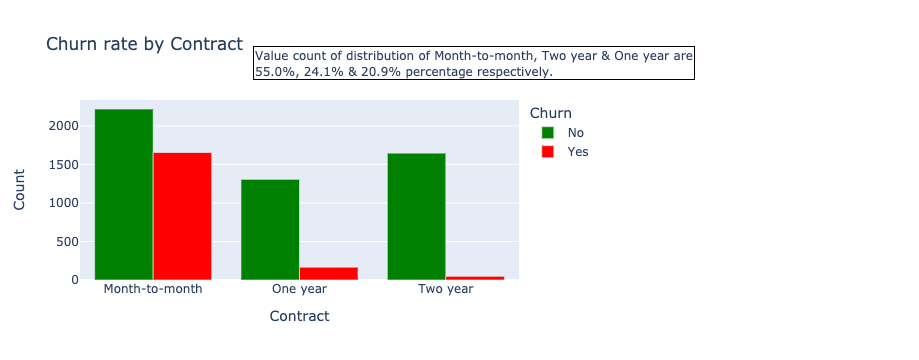

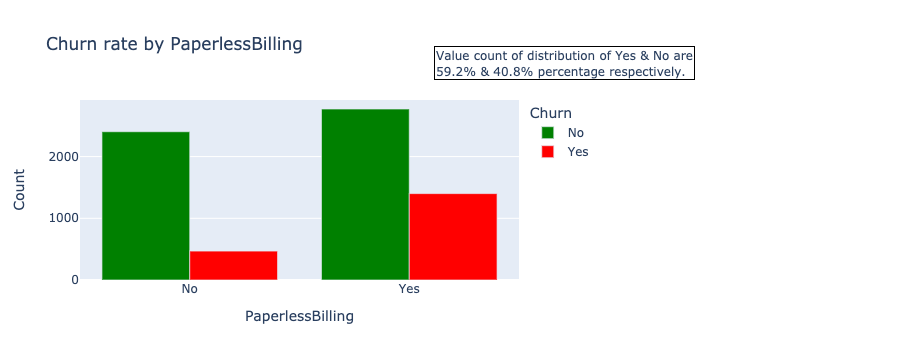

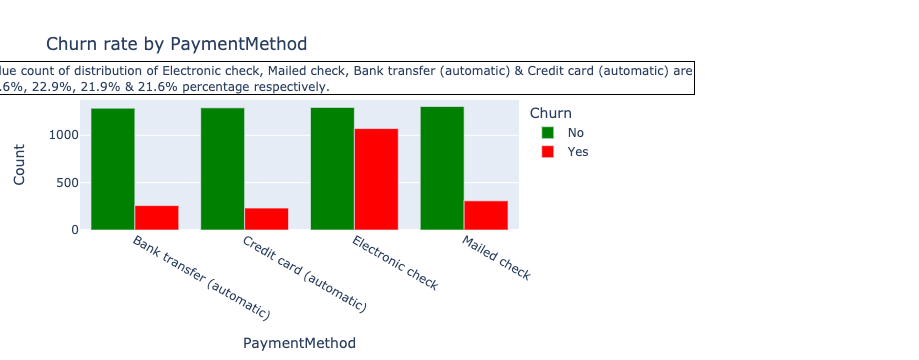

In [9]:
bar('Contract')
bar('PaperlessBilling')
bar('PaymentMethod')

**Payment**:
***
The shorter the contract the higher churn rate as those with longer plans face additional barriers when cancelling prematurely. This clearly explains the motivation for companies to have long-term relationship with their customers. Churn Rate is higher for the customers who opted for paperless billing, About 59.2% of the customers make paperless billing. Customers who pay with electronic check are more likely to churn and this kind of payment is more common than other payment types.
***

### Explore Numeric features

In [10]:
data_df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

It can be observed that the TotalCharges has an object data type which means that it contains string components. Let's convert it using lambda function.

In [11]:
try:
    data_df['TotalCharges'] = data_df['TotalCharges'].astype(float)
except ValueError as ve:
    print (ve)

could not convert string to float: ''


In [12]:
data_df['TotalCharges'] = pd.to_numeric(data_df['TotalCharges'],errors='coerce')

In [13]:
data_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
# Defining the histogram plotting function
def hist(feature):
    group_df = data_df.groupby([feature, 'Churn']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df, x=feature, y='Count', color='Churn', marginal='box', title=f'Churn rate frequency to {feature} distribution',color_discrete_sequence=["green", "red"])
    fig.show()

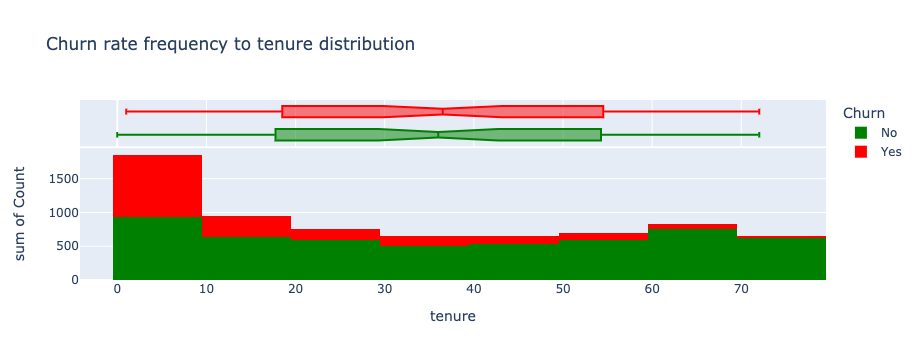

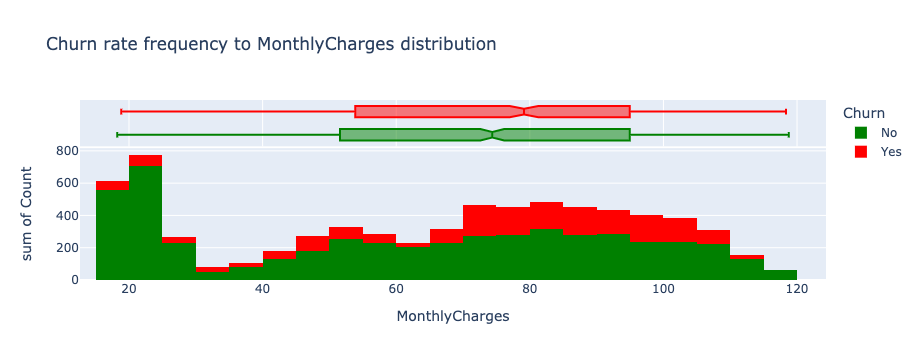

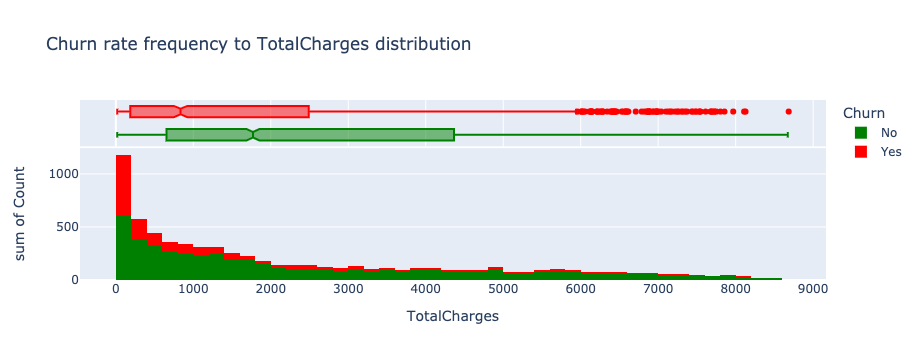

In [15]:
hist('tenure')
hist('MonthlyCharges')
hist('TotalCharges')

***
**Customer account information**: The tenure histogram is rightly skewed and shows that majority of customers has been with the telecom company for just the first few months (0-9 months) and the highest rate of churn is also in that first few months (0-9months). 75% of customers who end up leaving Telcom company  do so within their first 30 months. The monthly charge histogram shows that clients with higher monthly charges have a higher churn rate (This suggests that discounts and promotions can be an enticing reason for customers to stay). The total charge trend is quite depict due to variation in frequency.
Lets bin the numeric features into 3 sections based on quantiles (low, medium and high to get more information from it).
***

In [16]:
data_df['tenure_bins'] =  pd.qcut(data_df['tenure'], q=3, labels= ['low', 'medium', 'high'])
data_df['MonthlyCharges_bins'] =  pd.qcut(data_df['MonthlyCharges'], q=3, labels= ['low', 'medium', 'high'])
data_df['TotalCharges_bins'] =  pd.qcut(data_df['TotalCharges'], q=3, labels= ['low', 'medium', 'high'])

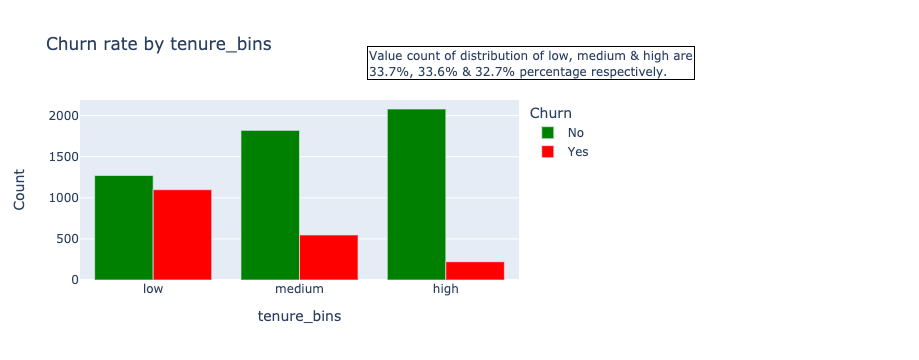

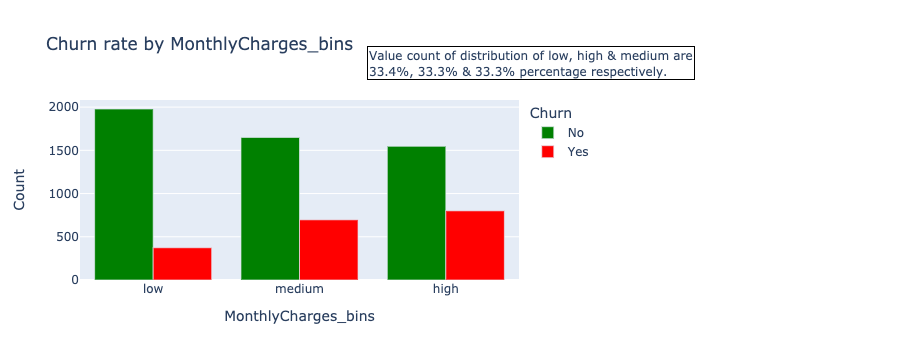

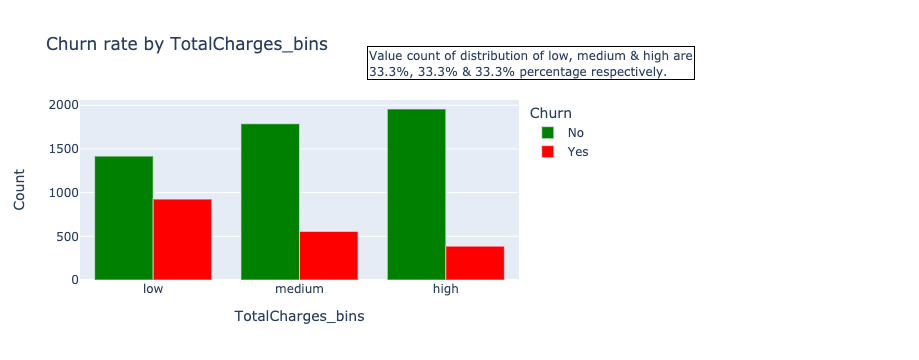

In [17]:
bar('tenure_bins')
bar('MonthlyCharges_bins')
bar('TotalCharges_bins')

***
Based on binning, the low tenure and high monthly charge bins have higher churn rates as supported with the previous analysis. While the low Total charge bin has a higher churn rate. 
***

In [18]:
data_df.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn tenure_bins MonthlyCharges_bins TotalCharges_bins  
0    No         low                 low               low  
1    No      medium              medium            medium  
2   Yes         low              medium               low  
3    No      medium                 low            medium  
4   Yes         low              medium               low

### Data Preprocessing

In [19]:
#Converting some binary variables (Yes/No) to 0/1
var_list = ['SeniorCitizen','PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

#Defining the map function
def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

#Applying the function to the binary variables
data_df[var_list] = data_df[var_list].apply(binary_map)

In [20]:
data_df.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female              0        1           0       1   
1  5575-GNVDE    Male              0        0           0      34   
2  3668-QPYBK    Male              0        0           0       2   
3  7795-CFOCW    Male              0        0           0      45   
4  9237-HQITU  Female              0        0           0       2   

   PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0             0  No phone service             DSL             No          Yes   
1             1                No             DSL            Yes           No   
2             1                No             DSL            Yes          Yes   
3             0  No phone service             DSL            Yes           No   
4             1                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

   PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0                 1           Electronic check           29.85         29.85   
1                 0               Mailed check           56.95       1889.50   
2                 1               Mailed check           53.85        108.15   
3                 0  Bank transfer (automatic)           42.30       1840.75   
4                 1           Electronic check           70.70        151.65   

   Churn tenure_bins MonthlyCharges_bins TotalCharges_bins  
0      0         low                 low               low  
1      0      medium              medium            medium  
2      1         low              medium               low  
3      0      medium                 low            medium  
4      1         low              medium               low

In [21]:
# Encoding gender category
data_df['gender'] = data_df['gender'].map({'Male':1, 'Female':0})

In [22]:
data_df.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0             0  No phone service             DSL             No          Yes   
1             1                No             DSL            Yes           No   
2             1                No             DSL            Yes          Yes   
3             0  No phone service             DSL            Yes           No   
4             1                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

   PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0                 1           Electronic check           29.85         29.85   
1                 0               Mailed check           56.95       1889.50   
2                 1               Mailed check           53.85        108.15   
3                 0  Bank transfer (automatic)           42.30       1840.75   
4                 1           Electronic check           70.70        151.65   

   Churn tenure_bins MonthlyCharges_bins TotalCharges_bins  
0      0         low                 low               low  
1      0      medium              medium            medium  
2      1         low              medium               low  
3      0      medium                 low            medium  
4      1         low              medium               low

In [23]:
# Encode Categories
data_df['Contract'] = data_df['Contract'].map({'Month-to-month':1,'One year':2,'Two year':3})

#Defining the map function
var_list = ['tenure_bins',	'MonthlyCharges_bins',	'TotalCharges_bins']
def bin_map(feature):
    return feature.map({'low':1, 'medium':2, 'high': 3})

#Applying the function to the binary variables
data_df[var_list] = data_df[var_list].apply(bin_map)

In [24]:
# Creating dummy variable for the services features
def dummy_encoding(df,feature):
    data_encoded = pd.get_dummies(df[feature], prefix=feature, drop_first=True)
    return data_encoded

In [25]:
feature_list = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod']
for feature in feature_list:
    data_encoded = dummy_encoding(data_df, feature)
    data_df = pd.concat([data_df, data_encoded], axis=1)
    data_df.drop(columns=feature, inplace=True)

data_df.head()    

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  Contract  PaperlessBilling  MonthlyCharges  TotalCharges  \
0             0         1                 1           29.85         29.85   
1             1         2                 0           56.95       1889.50   
2             1         1                 1           53.85        108.15   
3             0         2                 0           42.30       1840.75   
4             1         1                 1           70.70        151.65   

   Churn tenure_bins MonthlyCharges_bins TotalCharges_bins  \
0      0           1                   1                 1   
1      0           2                   2                 2   
2      1           1                   2                 1   
3      0           2                   1                 2   
4      1           1                   2                 1   

   MultipleLines_No phone service  MultipleLines_Yes  \
0                               1                  0   
1                               0                  0   
2                               0                  0   
3                               1                  0   
4                               0                  0   

   InternetService_Fiber optic  InternetService_No  \
0                            0                   0   
1                            0                   0   
2                            0                   0   
3                            0                   0   
4                            1                   0   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0                                   0                   0   
1                                   0                   1   
2                                   0                   1   
3                                   0                   1   
4                                   0                   0   

   OnlineBackup_No internet service  OnlineBackup_Yes  \
0                                 0                 1   
1                                 0                 0   
2                                 0                 1   
3                                 0                 0   
4                                 0                 0   

   DeviceProtection_No internet service  DeviceProtection_Yes  \
0                                     0                     0   
1                                     0                     1   
2                                     0                     0   
3                                     0                     1   
4                                     0                     0   

   TechSupport_No internet service  TechSupport_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                1   
4                                0                0   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                0   
4                                0                0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4           

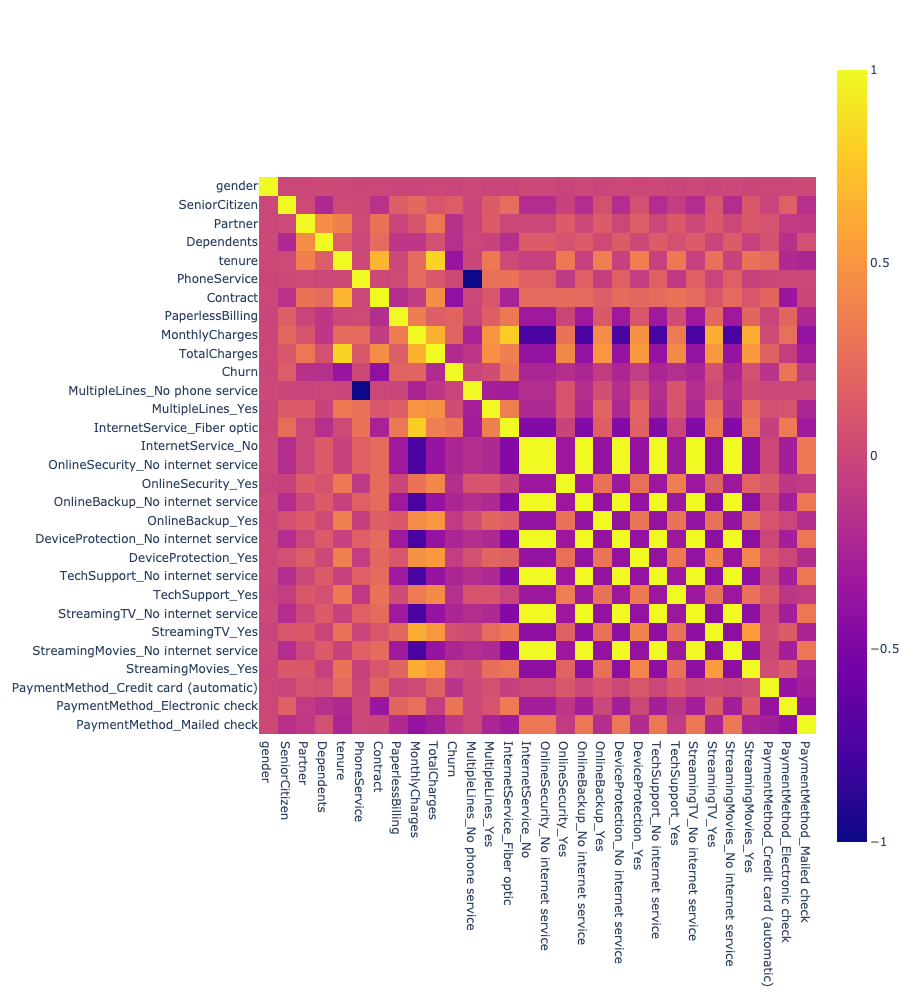

In [26]:
# Checking the correlation between features
corr = data_df.corr()

fig = px.imshow(corr,width=1000, height=1000)
fig.show()

Correlation is a statistical term is a measure on linear relationship with two variables. Features with high correlation are more linearly dependent and have almost the same effect on the dependent variable. So when two features have a high correlation, we can drop one of the two features.



In [50]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
 
all_columns = data_df.columns.to_list()
glm_columns = [e for e in all_columns if e not in ('customerID', 'Churn')]
list_to_string = ' + '.join(map(str, glm_columns))
glm_columns = list_to_string

       
glm_model = smf.glm(formula='Churn ~ {}'.format(glm_columns), data=data_df, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                            GLM   Df Residuals:                     7003
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2900.6
Date:                Sat, 24 Jul 2021   Deviance:                       5801.2
Time:                        17:00:41   Pearson chi2:                 7.43e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------